## Edible or Poisonous: Mushroom Species Identification using Machine Learning

In this project, the goal was to develop a robust machine learning model capable of accurately classifying mushrooms into their respective species, particularly distinguishing between edible and poisonous varieties. The dataset used comprised various features such as cap color, odor, habitat, and more, collected from different mushroom samples.

Multiple machine learning algorithms — decision trees, random forests, SVMs — were explored to identify the most effective model for classification. 
Validation methods like cross-validation and hyperparameter tuning were employed to refine and assess model performance, ensuring robustness and minimizing potential overfitting. The model's efficacy was evaluated using diverse metrics such as accuracy, precision, recall, and F1-score.Additionally, visualization tools like confusion matrices, ROC curves, and precision-recall curves were utilized to provide a comprehensive overview of the model's capabilities.

Ultimately, this project aimed to create a reliable machine learning model for preliminary mushroom species classification, emphasizing the responsible application of technology in domains crucial for human safety and well-being.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from time import process_time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, OneClassSVM, NuSVC
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv, MetricVisualizer
from scipy.stats import randint
from sklearn.model_selection import KFold

### Loading Data and Getting Data Information

In this project we will analyze dataset taken from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification) 
The dataset description from Kaggle:
> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family
> Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely
> poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. This dataset was originally donated to > the UCI Machine Learning repository.

Now lets read the data! 

In [2]:
data = pd.read_csv("data/mushrooms.csv")

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.shape

(8124, 23)

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

By using .dtypes, we established that all features are of type 'object'.

Attribute Information from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification)

> classes: edible=e, poisonous=p

> cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

> cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

> cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

> bruises: bruises=t,no=f

> odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

> gill-attachment: attached=a,descending=d,free=f,notched=n

> gill-spacing: close=c,crowded=w,distant=d

> gill-size: broad=b,narrow=n

> gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

> stalk-shape: enlarging=e,tapering=t

> stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

> stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

> stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

> stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

> stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

> veil-type: partial=p,universal=u

> veil-color: brown=n,orange=o,white=w,yellow=y

> ring-number: none=n,one=o,two=t

> ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

> spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

> population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

> habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [6]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data['stalk-root'] = data['stalk-root'].apply(lambda x: 'm' if '?' in x else x)

Although we don't have null-valued features, there's one instance: thе feature 'stalk-root' contains a value of '?', which we replace with 'm' to denote missing information.

### Data Visualisation

In the next section data is visualized using boxplots and countplots to analyze features. Boxplots revealed distributions and outliers, capturing feature tendencies. Countplots showcased categorical variable frequencies, giving insights into their distribution relative to both classes. These visuals provided a comprehensive overview for informed decision-making.

In [9]:
selected_columns_for_eda = data.loc[:, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-color', 'stalk-shape', 'stalk-root', 'ring-number', 'population', 'habitat']] 

In [10]:
custom_palette = ['#FF1493', '#4169E1']

In [11]:
def count_plot_feature_vs_class(features: list):
    for feature in features:
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(x=data[feature], hue='class', data=data, palette=custom_palette)
        
        for plot_container in count_plot.containers:
            count_plot.bar_label(plot_container, label_type='edge', color='black')
        
        plt.title(f'{feature} vs. Mushroom Class', fontsize=14, fontweight='bold', color='green')
        plt.xlabel(feature, fontsize=12, fontweight='bold', color='green')
        plt.ylabel('Count', fontsize=12, fontweight='bold', color='green')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()

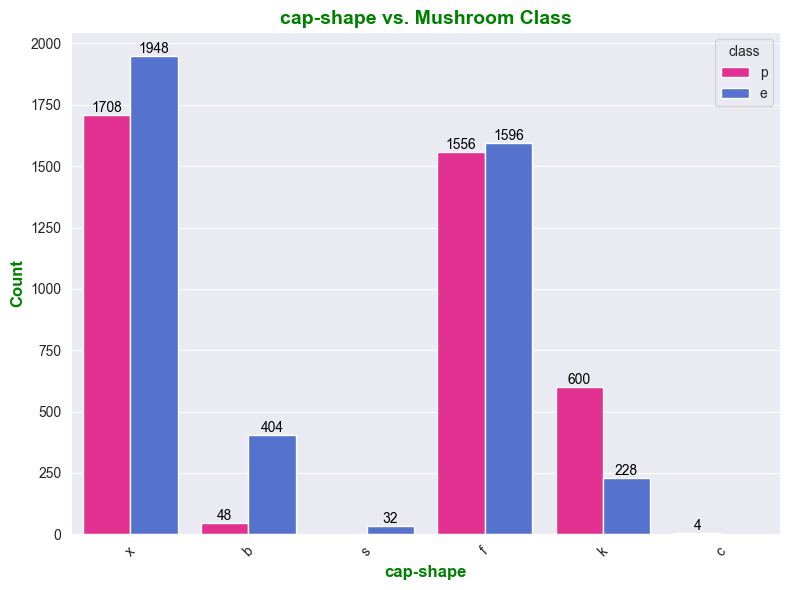

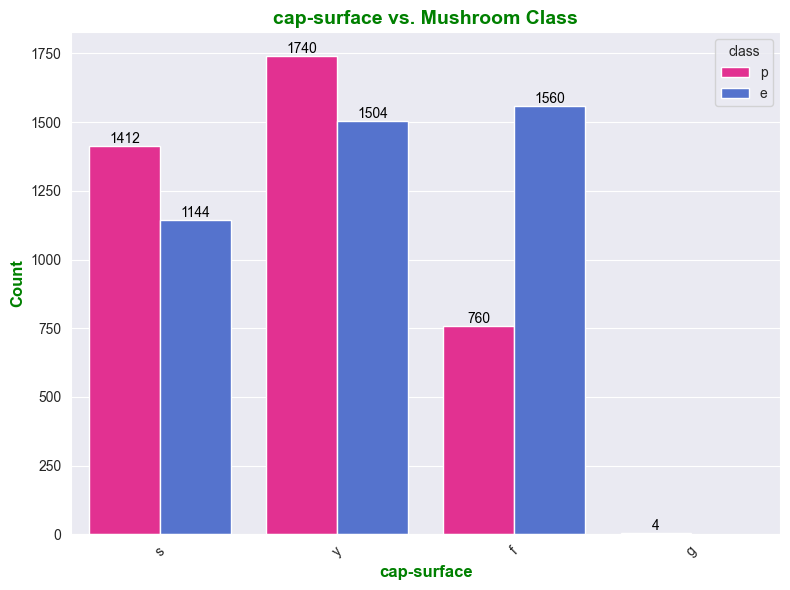

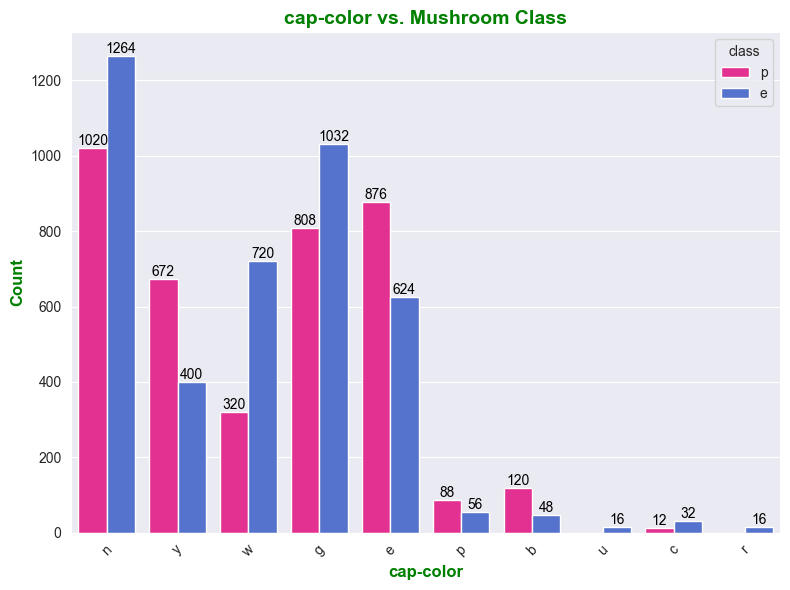

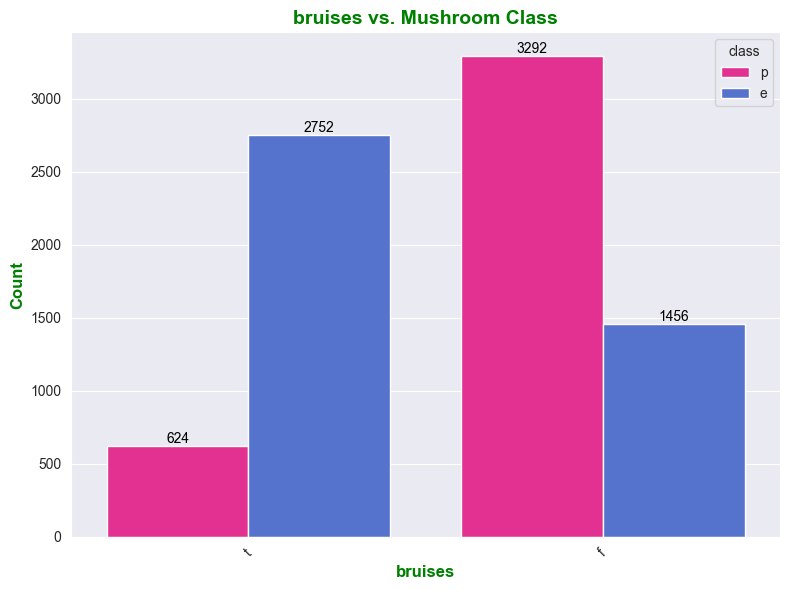

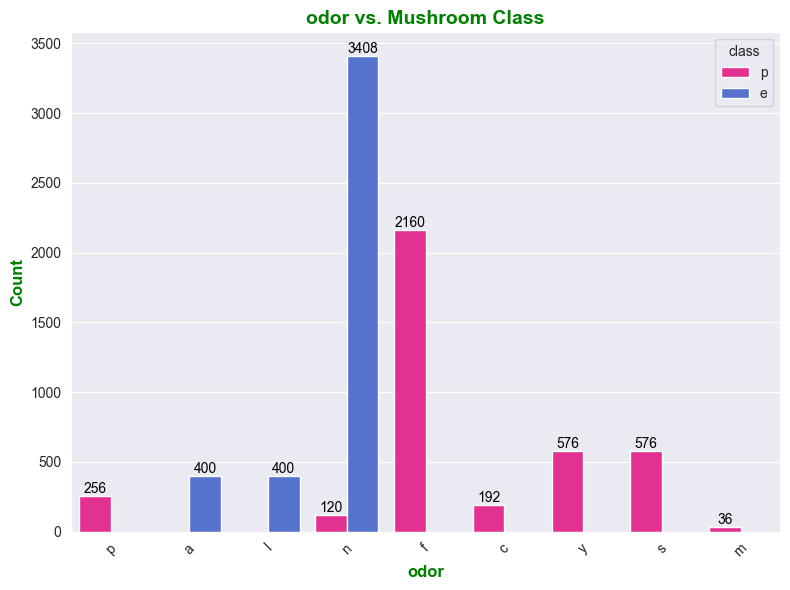

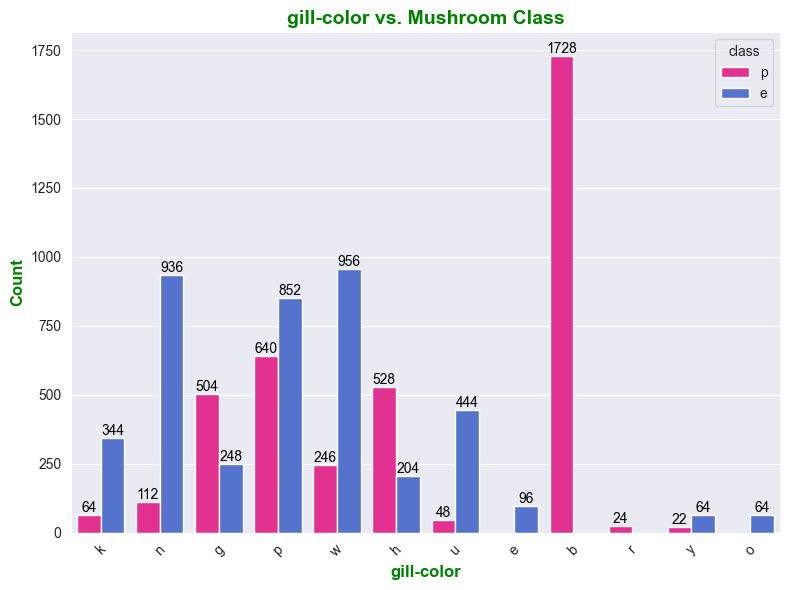

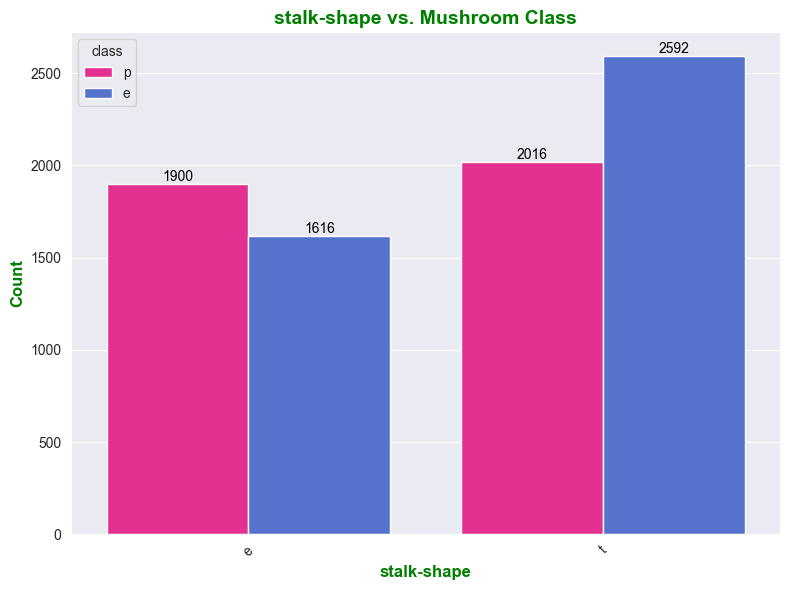

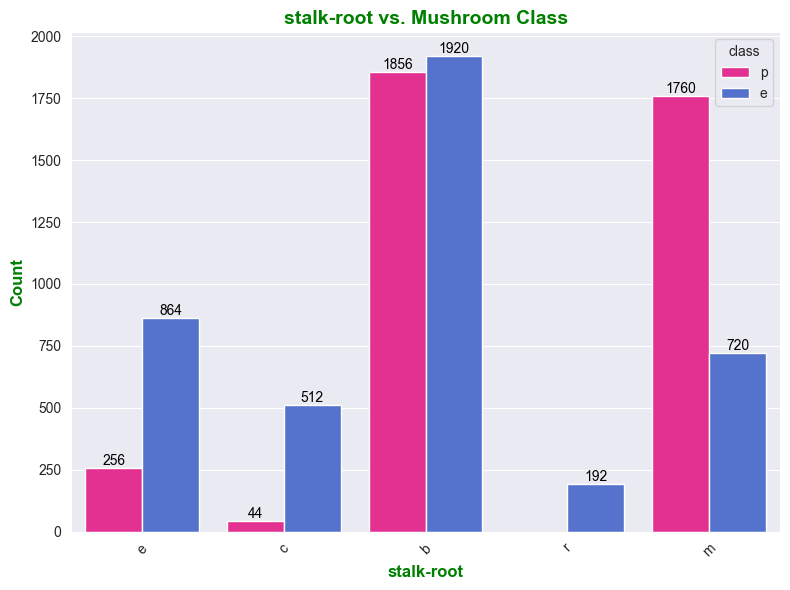

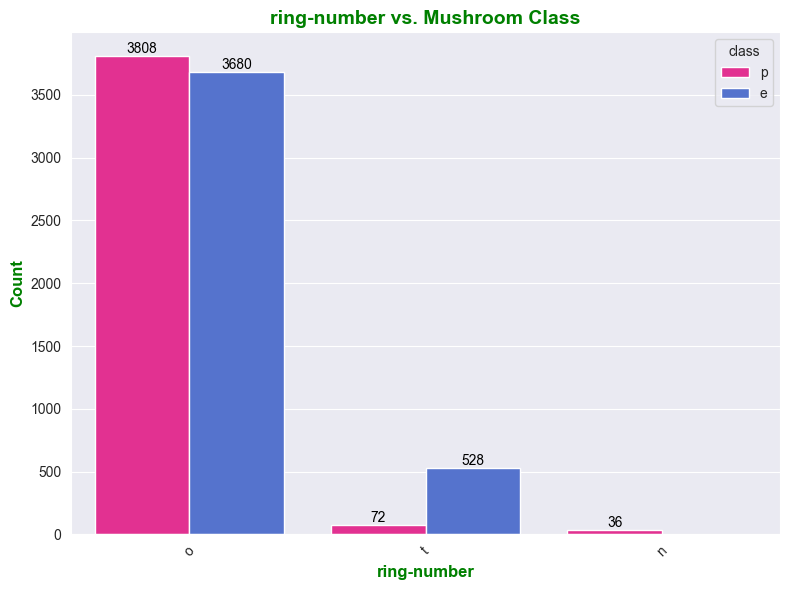

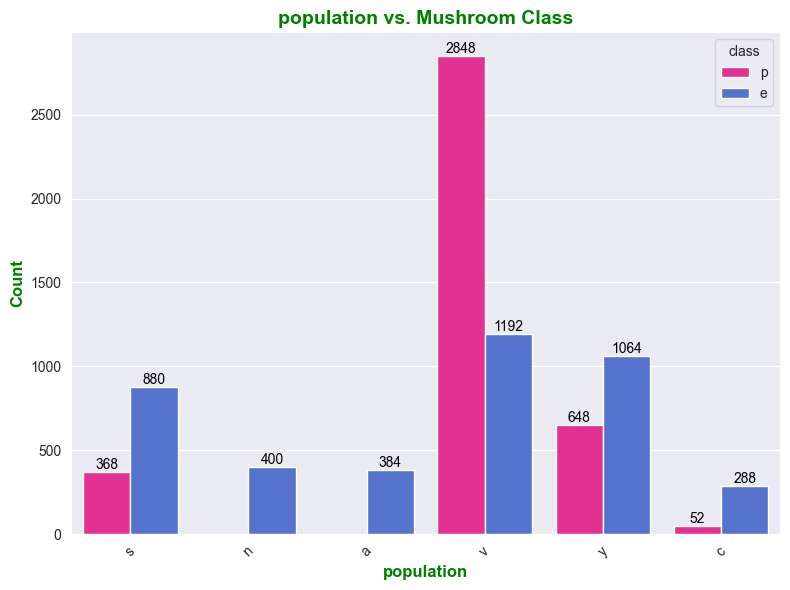

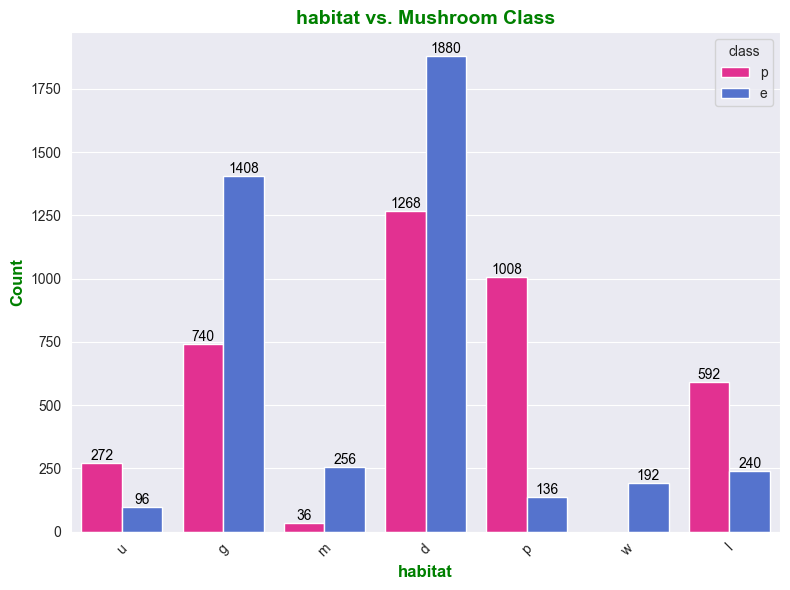

In [12]:
count_plot_feature_vs_class(features=selected_columns_for_eda)

In [13]:
def box_plot_feature_vs_class(features: list):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    custom_colors = {'e': '#4169E1', 'p': '#FF1493'}
    
    for column in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='class', hue='class', y=column, data=data, palette=custom_colors, legend=False)
        plt.title(f"Box Plot of {column} by Class")
        plt.xlabel("Class")
        plt.ylabel(column)
        plt.show()

<Figure size 1000x600 with 0 Axes>

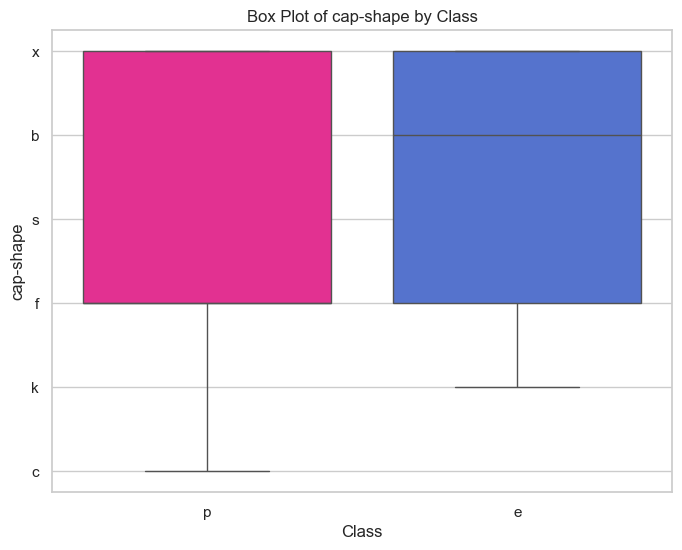

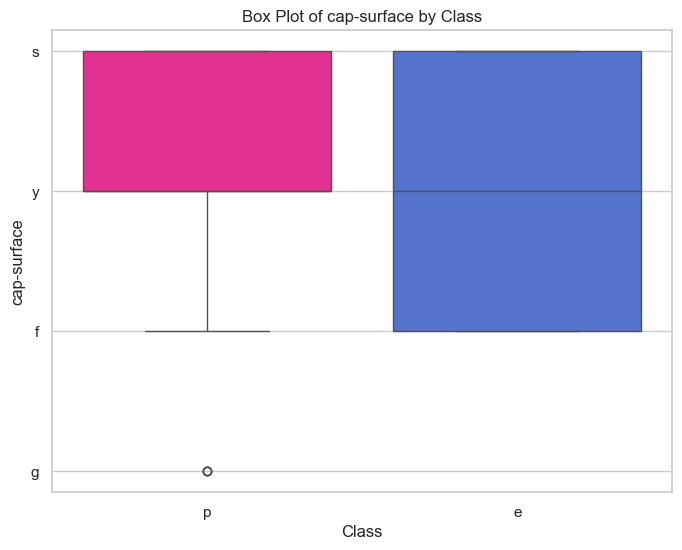

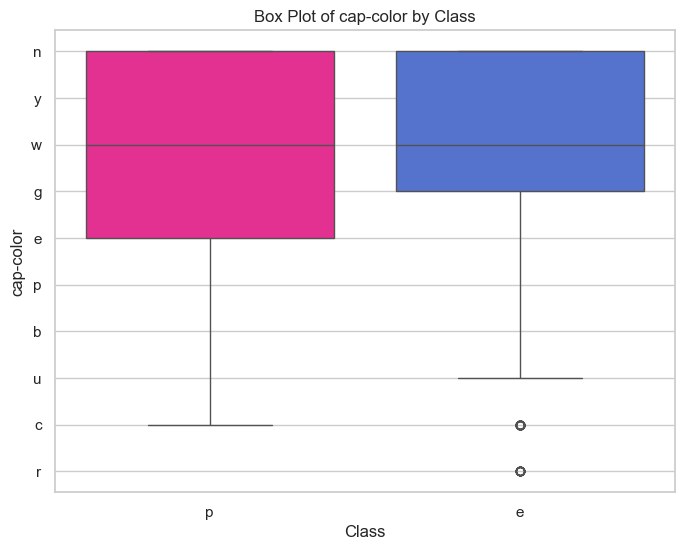

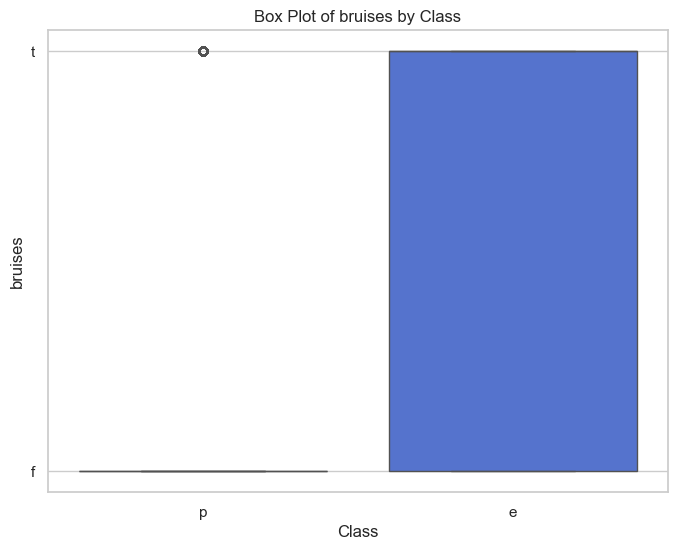

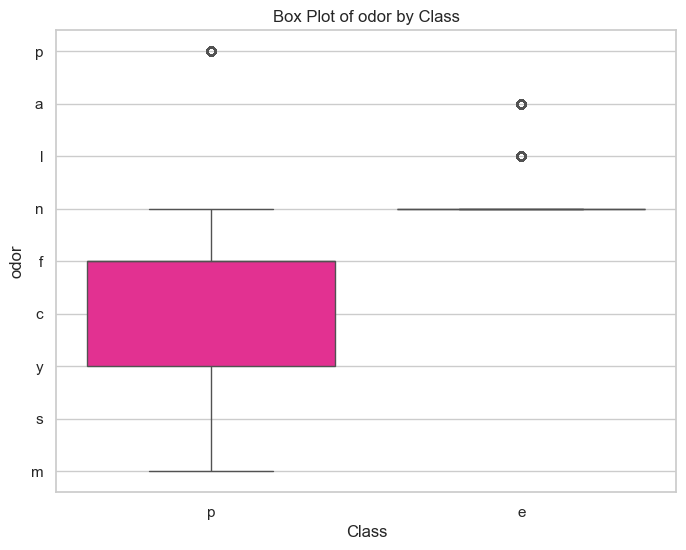

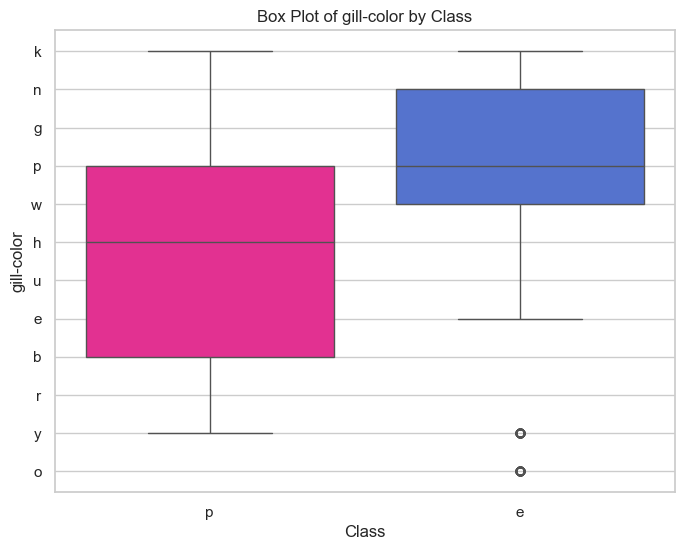

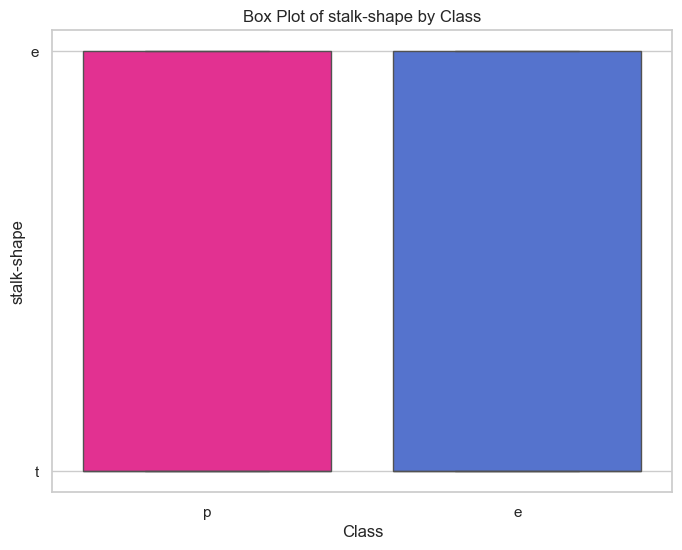

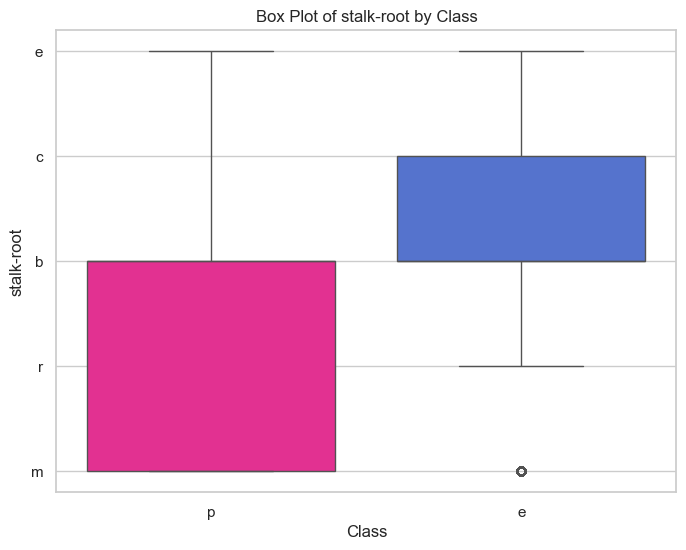

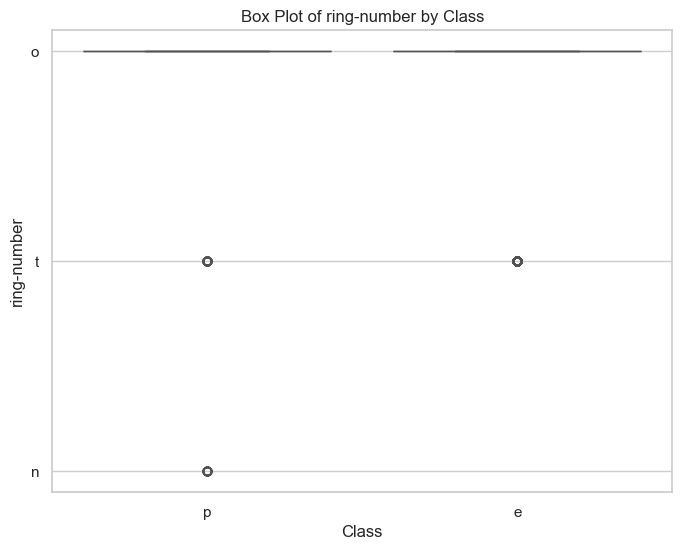

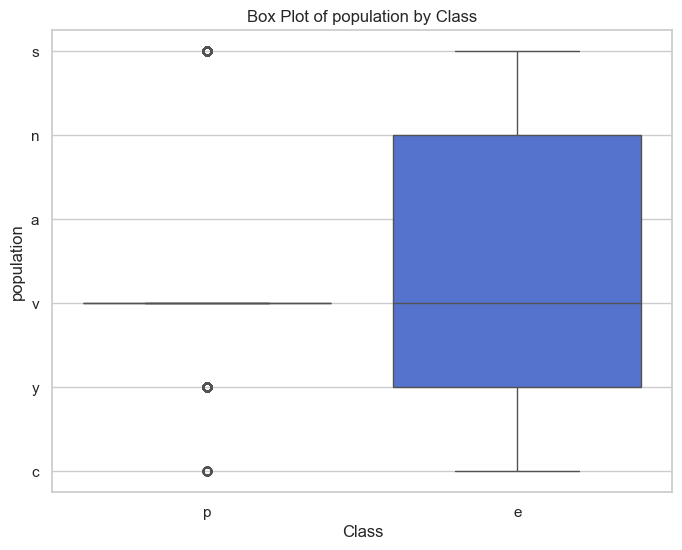

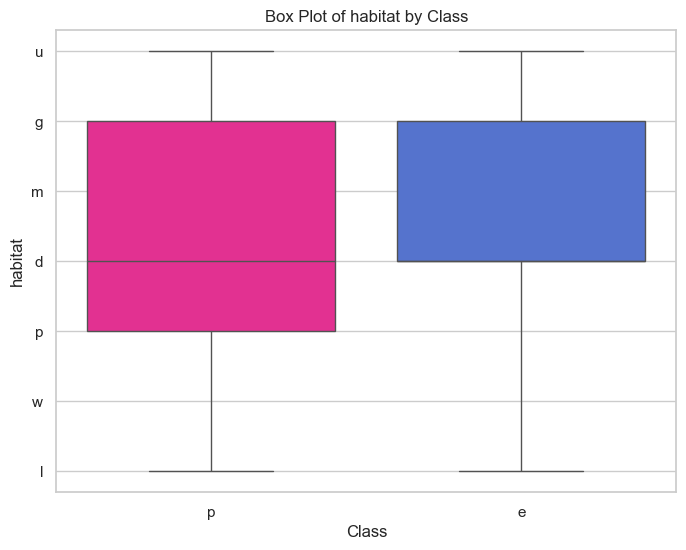

In [14]:
box_plot_feature_vs_class(features=selected_columns_for_eda)

## Feature Engineering

In the following lines of code, I removed certain values from the categorical features. Eliminating rare values from a categorical feature in machine learning can improve model performance by decreasing noise and overfitting, directing the model's focus toward more common and informative categories. This practice enhances the model's robustness and predictive accuracy by prioritizing significant and representative data.

In [15]:
def handle_non_standard_values(value: str, standard_values: list):
    if value not in standard_values:
        return 'Others'
    return value

In [16]:
data['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [17]:
data['cap-shape'] = data['cap-shape'].apply(lambda x: handle_non_standard_values(x, ['x', 'f', 'k']))

In [18]:
data['cap-shape'].value_counts()

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [19]:
data['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [20]:
data['cap-surface'] = data['cap-surface'].apply(lambda x: handle_non_standard_values(x, ['y', 's']))

In [21]:
data['cap-surface'].value_counts()

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [22]:
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [23]:
data['cap-color'] = data['cap-color'].apply(lambda x: handle_non_standard_values(x, ['n', 'g', 'e', 'y', 'w']))

In [24]:
data['cap-color'].value_counts()

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [25]:
data['odor'].value_counts()

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

In [26]:
data['odor'] = data['odor'].apply(lambda x: handle_non_standard_values(x, ['n','f','y','s']))

In [27]:
data['odor'].value_counts()

odor
n         3528
f         2160
Others    1284
y          576
s          576
Name: count, dtype: int64

In [28]:
data['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [29]:
data['gill-color'] = data['gill-color'].apply(lambda x: handle_non_standard_values(x, ['b','p','w','n','g','h','u','k']))

In [30]:
data['gill-color'].value_counts()

gill-color
b         1728
p         1492
w         1202
n         1048
g          752
h          732
u          492
k          408
Others     270
Name: count, dtype: int64

In [31]:
data['spore-print-color'].value_counts()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [32]:
data['spore-print-color'] = data['spore-print-color'].apply(lambda x: handle_non_standard_values(x, ['w','n','k','h']))

In [33]:
data['spore-print-color'].value_counts()

spore-print-color
w         2388
n         1968
k         1872
h         1632
Others     264
Name: count, dtype: int64

In [34]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

In [35]:
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [36]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w         4464
p         1872
g          576
n          448
b          432
Others     332
Name: count, dtype: int64

In [37]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

In [38]:
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [39]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w         4384
p         1872
g          576
n          512
b          432
Others     348
Name: count, dtype: int64

I've removed certain columns due to the absence of representative examples for some of their values, deeming them non-essential for the model performance.

In [40]:
data.drop(columns= ['gill-attachment', 'gill-spacing', 'veil-type',], inplace= True)

In [41]:
data['class'].unique()

array(['p', 'e'], dtype=object)

I found LabelEncoding highly beneficial for my case and implemented it for features such as 'class,' 'bruises,' and 'ring-number'. Additionally, I applied One-Hot Encoding to other categorical features for improved model interpretation and learning from the categorical data.

In [42]:
encoder = LabelEncoder()

In [43]:
encoder.fit(data['bruises'])
encoder.classes_ = np.array(['f', 't'])
data['bruises'] = encoder.transform(data['bruises'])

In [44]:
data['bruises']

0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int32

In [45]:
data['ring-number']

0       o
1       o
2       o
3       o
4       o
       ..
8119    o
8120    o
8121    o
8122    o
8123    o
Name: ring-number, Length: 8124, dtype: object

In [46]:
encoder.fit(data['ring-number'])
encoder.classes_ = np.array(['n', 'o', 't'])
data['ring-number'] = encoder.transform(data['ring-number'])

In [47]:
data['ring-number']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: ring-number, Length: 8124, dtype: int32

In [48]:
encoder.fit(data['class'])
encoder.classes_ = np.array(['p', 'e'])
data['class'] = encoder.transform(data['class'])

In [49]:
data['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int32

In [50]:
category_columns = list(data.select_dtypes(include = ['object']).columns)

In [51]:
category_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [52]:
data = pd.get_dummies(data, columns=category_columns, dtype=int)

In [53]:
data.dtypes

class               int32
bruises             int32
ring-number         int32
cap-shape_Others    int32
cap-shape_f         int32
                    ...  
habitat_l           int32
habitat_m           int32
habitat_p           int32
habitat_u           int32
habitat_w           int32
Length: 86, dtype: object

In [54]:
## Data Preparation and Splitting for Model Training

In [55]:
X = data.drop('class', axis=1)
y = data['class']

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bruises                        8124 non-null   int32
 1   ring-number                    8124 non-null   int32
 2   cap-shape_Others               8124 non-null   int32
 3   cap-shape_f                    8124 non-null   int32
 4   cap-shape_k                    8124 non-null   int32
 5   cap-shape_x                    8124 non-null   int32
 6   cap-surface_Others             8124 non-null   int32
 7   cap-surface_s                  8124 non-null   int32
 8   cap-surface_y                  8124 non-null   int32
 9   cap-color_Others               8124 non-null   int32
 10  cap-color_e                    8124 non-null   int32
 11  cap-color_g                    8124 non-null   int32
 12  cap-color_n                    8124 non-null   int32
 13  cap-color_w       

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [58]:
X.shape ,X_train.shape, X_test.shape

((8124, 85), (5686, 85), (2438, 85))

In [59]:
y.shape, y_train.shape, y_test.shape

((8124,), (5686,), (2438,))

The following two functions compute the normalized value counts of the target variable and subsequently return the maximum occurrence ratio among the different classes. This operation is beneficial as it offers insights into the class distribution within the training dataset.

In [60]:
y_train.value_counts(normalize= True).max()

0.5179387970453746

In [61]:
y_test.value_counts(normalize= True).max()

0.5180475799835931

## Models Traininig

### LogisticRegression

Logistic Regression is a supervised learning algorithm used for classification tasks in supervised machine learning. It learns from labeled training data, where it's provided with input features and their corresponding target labels. By observing these examples, the algorithm finds the relationship between the features and the categorical outcome, enabling it to make predictions on new, unseen data.

I began with a Logistic Regression model without hyperparameters.

In [316]:
baseline_log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [317]:
baseline_log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [318]:
baseline_log_reg.score(X_test, y_test)

0.9995898277276456

In [319]:
train_pred_log_reg = baseline_log_reg.predict(X_train)
test_pred_log_reg = baseline_log_reg.predict(X_test)

In [320]:
train_accuracy_log_reg = accuracy_score(y_train, train_pred_log_reg)

In [321]:
train_accuracy_log_reg

0.9994723883221949

In [322]:
test_accuracy_log_reg = accuracy_score(y_test, test_pred_log_reg)

In [323]:
test_accuracy_log_reg

0.9995898277276456

In [324]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=None, save_path=None):
    if cmap is None:
        cmap = ['#FF1493', '#4169E1']
    sns.heatmap(cm, annot=True, cmap=sns.color_palette(cmap), fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [325]:
cm_baseline_train = confusion_matrix(y_train, train_pred_log_reg)

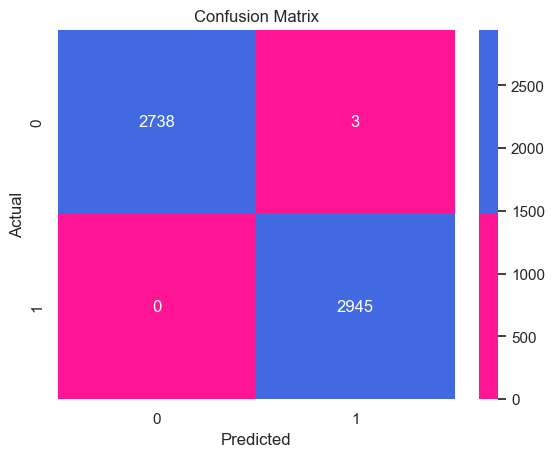

In [326]:
plot_confusion_matrix(cm_baseline_train)

In [327]:
cm_baseline_test = confusion_matrix(y_test, test_pred_log_reg)

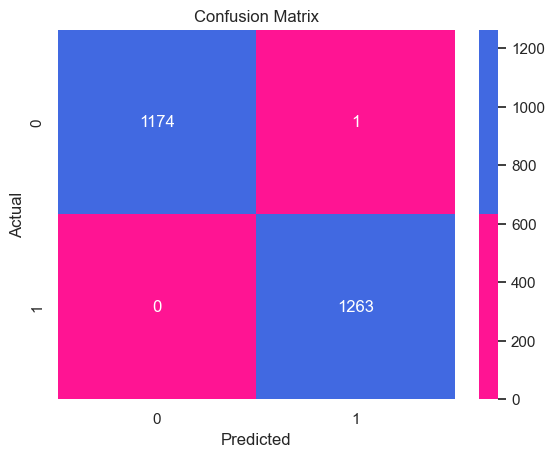

In [328]:
plot_confusion_matrix(cm_baseline_test)

In [329]:
train_baseline_report = classification_report(y_train, train_pred_log_reg, output_dict=True)

In [330]:
pd.DataFrame(train_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.000000,0.998906,0.999452,2741.000000
1,0.998982,1.000000,0.999491,2945.000000
accuracy,0.999472,0.999472,0.999472,0.999472
macro avg,0.999491,0.999453,0.999472,5686.000000
weighted avg,0.999473,0.999472,0.999472,5686.000000


In [331]:
test_baseline_report = classification_report(y_test, test_pred_log_reg, output_dict=True)

In [332]:
pd.DataFrame(test_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.000000,0.999149,0.999574,1175.00000
1,0.999209,1.000000,0.999604,1263.00000
accuracy,0.999590,0.999590,0.999590,0.99959
macro avg,0.999604,0.999574,0.999589,2438.00000
weighted avg,0.999590,0.999590,0.999590,2438.00000


In [333]:
log_reg_scores = cross_val_score(baseline_log_reg, X, y, cv=5)

print("Logistic Regression without hyperparams Cross-Validation Scores:", log_reg_scores)
print("Mean Accuracy:", log_reg_scores .mean())

Logistic Regression with C Cross-Validation Scores: [0.79938462 0.99938462 0.95015385 1.         0.62438424]
Mean Accuracy: 0.8746614626752558


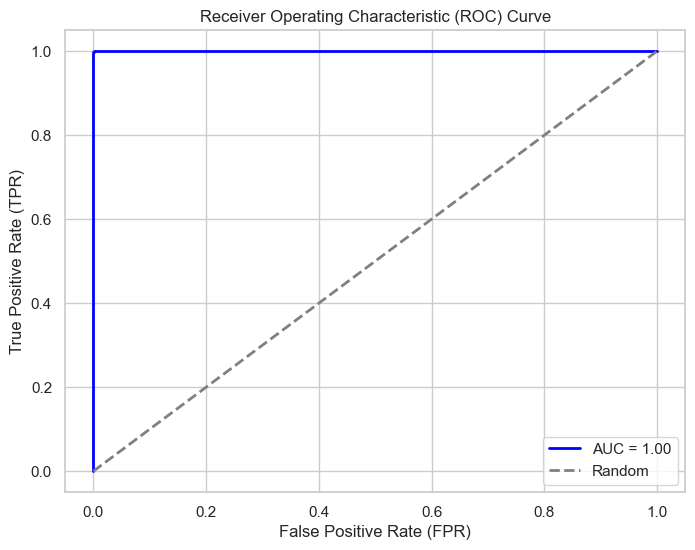

In [334]:
y_scores = baseline_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

I used GridSearchCV to find the optimal value for the "C" parameter in Logistic Regression, aiming to enhance model performance. Adjusting "C" through GridSearchCV allowed the model to strike the right balance between bias and variance, enhancing its capability to generalize to new, unseen data.

In [221]:
param_grid_c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [281]:
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_c, cv=5)
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [282]:
best_C = grid_search_log_reg.best_params_['C']

In [283]:
best_C

10

In [284]:
grid_search_log_reg.best_score_

1.0

In [285]:
grid_search_log_reg.cv_results_

{'mean_fit_time': array([0.02434621, 0.03608932, 0.07497678, 0.1991971 , 0.18278942,
        0.22523236, 0.2346292 ]),
 'std_fit_time': array([0.00750518, 0.00877325, 0.03179448, 0.07745613, 0.00913042,
        0.00775098, 0.00988036]),
 'mean_score_time': array([0.00745492, 0.00053291, 0.00368514, 0.00150213, 0.003125  ,
        0.        , 0.00300241]),
 'std_score_time': array([0.00676643, 0.00106583, 0.00606546, 0.00189071, 0.00625   ,
        0.        , 0.00600481]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.90685413, 0.97012302, 0.98066784, 0.99912127, 1.        ,
        1.        , 1.        ]),
 'split1_test_score': array([0.91644679, 0.96833773, 0.97801231, 0.99384345, 1.        ,
        1.

In [286]:
optimized_log_reg = LogisticRegression(C=best_C, max_iter=200)

In [287]:
optimized_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [312]:
optimized_log_reg.score(X_test, y_test)

1.0

In [313]:
train_pred_optimized_log_reg = optimized_log_reg.predict(X_train)
test_pred_optimized_log_reg = optimized_log_reg.predict(X_test)

In [290]:
train_accuracy_optimized_log_reg = accuracy_score(y_train, train_pred_optimized_log_reg)

In [291]:
train_accuracy_optimized_log_reg

1.0

In [292]:
test_accuracy_optimized_log_reg = accuracy_score(y_test, test_pred_optimized_log_reg)

In [293]:
test_accuracy_optimized_log_reg

1.0

In [294]:
cm_optimized_train = confusion_matrix(y_train, train_pred_optimized_log_reg)

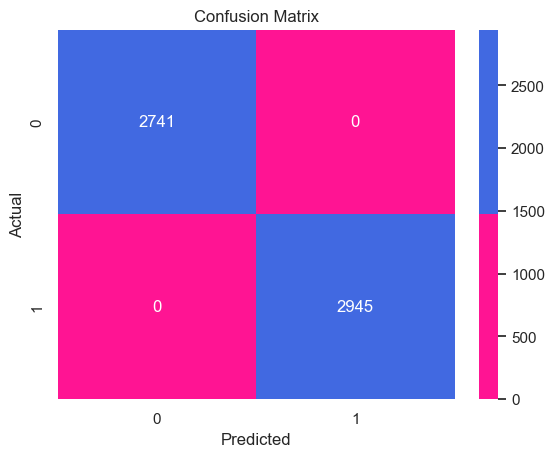

In [295]:
plot_confusion_matrix(cm_optimized_train)

In [296]:
cm_optimized_test = confusion_matrix(y_test, test_pred_optimized_log_reg)

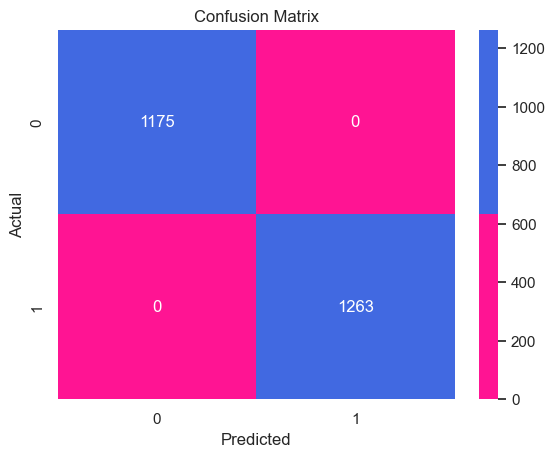

In [297]:
plot_confusion_matrix(cm_optimized_test)

In [298]:
train_optimized_report = classification_report(y_train, train_pred_optimized_log_reg, output_dict=True)

In [276]:
pd.DataFrame(train_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,2741.0
1,1.0,1.0,1.0,2945.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,5686.0
weighted avg,1.0,1.0,1.0,5686.0


In [277]:
test_optimized_report = classification_report(y_test, test_pred_optimized_log_reg, output_dict=True)

In [278]:
pd.DataFrame(test_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


In [335]:
optimized_log_reg_scores = cross_val_score(optimized_log_reg, X, y, cv=5)

print("Logistic Regression with C Cross-Validation Scores:", optimized_log_reg_scores)
print("Mean Accuracy:", optimized_log_reg_scores.mean())

Logistic Regression with C Cross-Validation Scores: [0.84123077 1.         0.99384615 1.         0.65086207]
Mean Accuracy: 0.8971877984084881


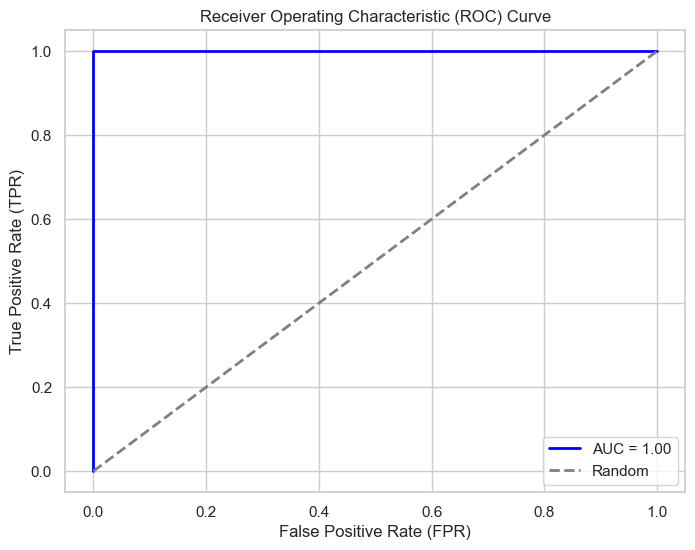

In [279]:
y_scores = optimized_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve_optimized.png')
plt.show()

## DecisionTree
Utilizing a Decision Tree for binary classification offers interpretability and ease of visualization, aiding in understanding the decision-making process. As emphasized in lectures, Decision Trees are advantageous for handling non-linear relationships between features and the target variable, allowing for flexible modeling without assuming linear correlations, thus capturing complex decision boundaries more effectively than linear models. Additionally, Decision Trees are less sensitive to outliers and feature scaling, making them suitable for datasets with varying scales or irregularities.

In [103]:
param_tree_cls = {
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [104]:
baseline_tree_cls = DecisionTreeClassifier(random_state=42)

In [105]:
random_search = RandomizedSearchCV(baseline_tree_cls, param_distributions=param_tree_cls, n_iter=20,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FBEF2BCD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FBEF29F30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027FBEF79930>},
                   random_state=42, scoring='accuracy')

In [106]:
best_params = random_search.best_params_

In [107]:
best_params

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 16}

In [108]:
random_search.best_score_

1.0

In [109]:
best_tree = random_search.best_estimator_

In [110]:
best_tree

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=16,
                       random_state=42)

In [111]:
y_pred_best_tree = best_tree.predict(X_test)
test_accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)

In [112]:
test_accuracy_best_tree

1.0

In [113]:
cm_best_tree_test = confusion_matrix(y_test, y_pred_best_tree)

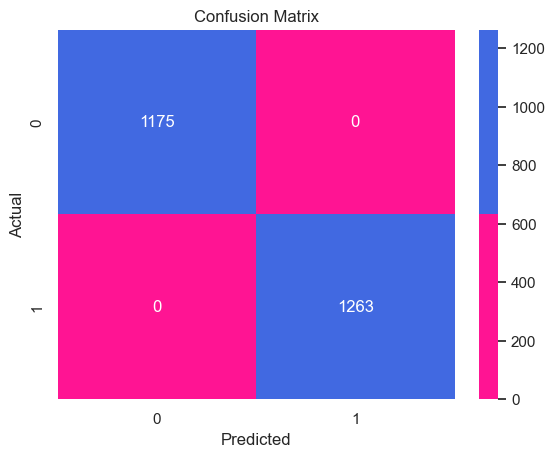

In [114]:
plot_confusion_matrix(cm_best_tree_test)

In [115]:
test_best_tree_cls_report = classification_report(y_test, y_pred_best_tree, output_dict=True)

In [116]:
pd.DataFrame(test_best_tree_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


In [117]:
def calculate_feature_importance(tree, x):
    importance = tree.feature_importances_
    
    feature_importance_df = pd.DataFrame({'Feature Names': x.columns, 'Importance': importance})
    return feature_importance_df[feature_importance_df['Importance'] > 0].sort_values(by='Importance', ascending=False)

In [118]:
calculate_feature_importance(best_tree, X)

,Feature Names,Importance
17,odor_n,0.617394
15,odor_Others,0.176593
21,gill-size_n,0.089330
32,stalk-shape_t,0.040152
81,habitat_m,0.017887
71,spore-print-color_w,0.016745
45,stalk-surface-below-ring_y,0.014674
51,stalk-color-above-ring_w,0.013660
33,stalk-root_b,0.005669
57,stalk-color-below-ring_w,0.004445


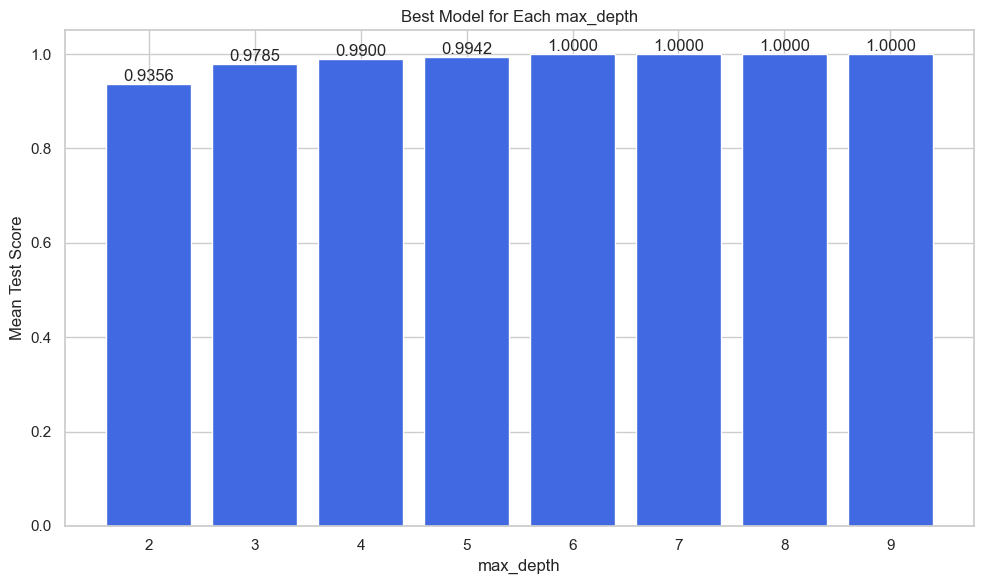

In [119]:
results = random_search.cv_results_

max_depth_values = results['param_max_depth']
mean_test_scores = results['mean_test_score']
params = results['params']

best_scores = {}
for depth, score, param in zip(max_depth_values, mean_test_scores, params):
    if depth not in best_scores or score > best_scores[depth][0]:
        best_scores[depth] = (score, param)

depths = list(range(2, 10))
scores = [best_scores.get(depth, (None, None))[0] for depth in depths]

plt.figure(figsize=(10, 6))
plt.bar(depths, scores, color='#4169E1')
plt.title("Best Model for Each max_depth")
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
for i, score in enumerate(scores):
    if score is not None:
        plt.text(depths[i], score, f"{score:.4f}", ha='center', va='bottom')

plt.xticks(depths)
plt.tight_layout()
# plt.savefig('decision_tree_bars.png', bbox_inches='tight')
plt.show()

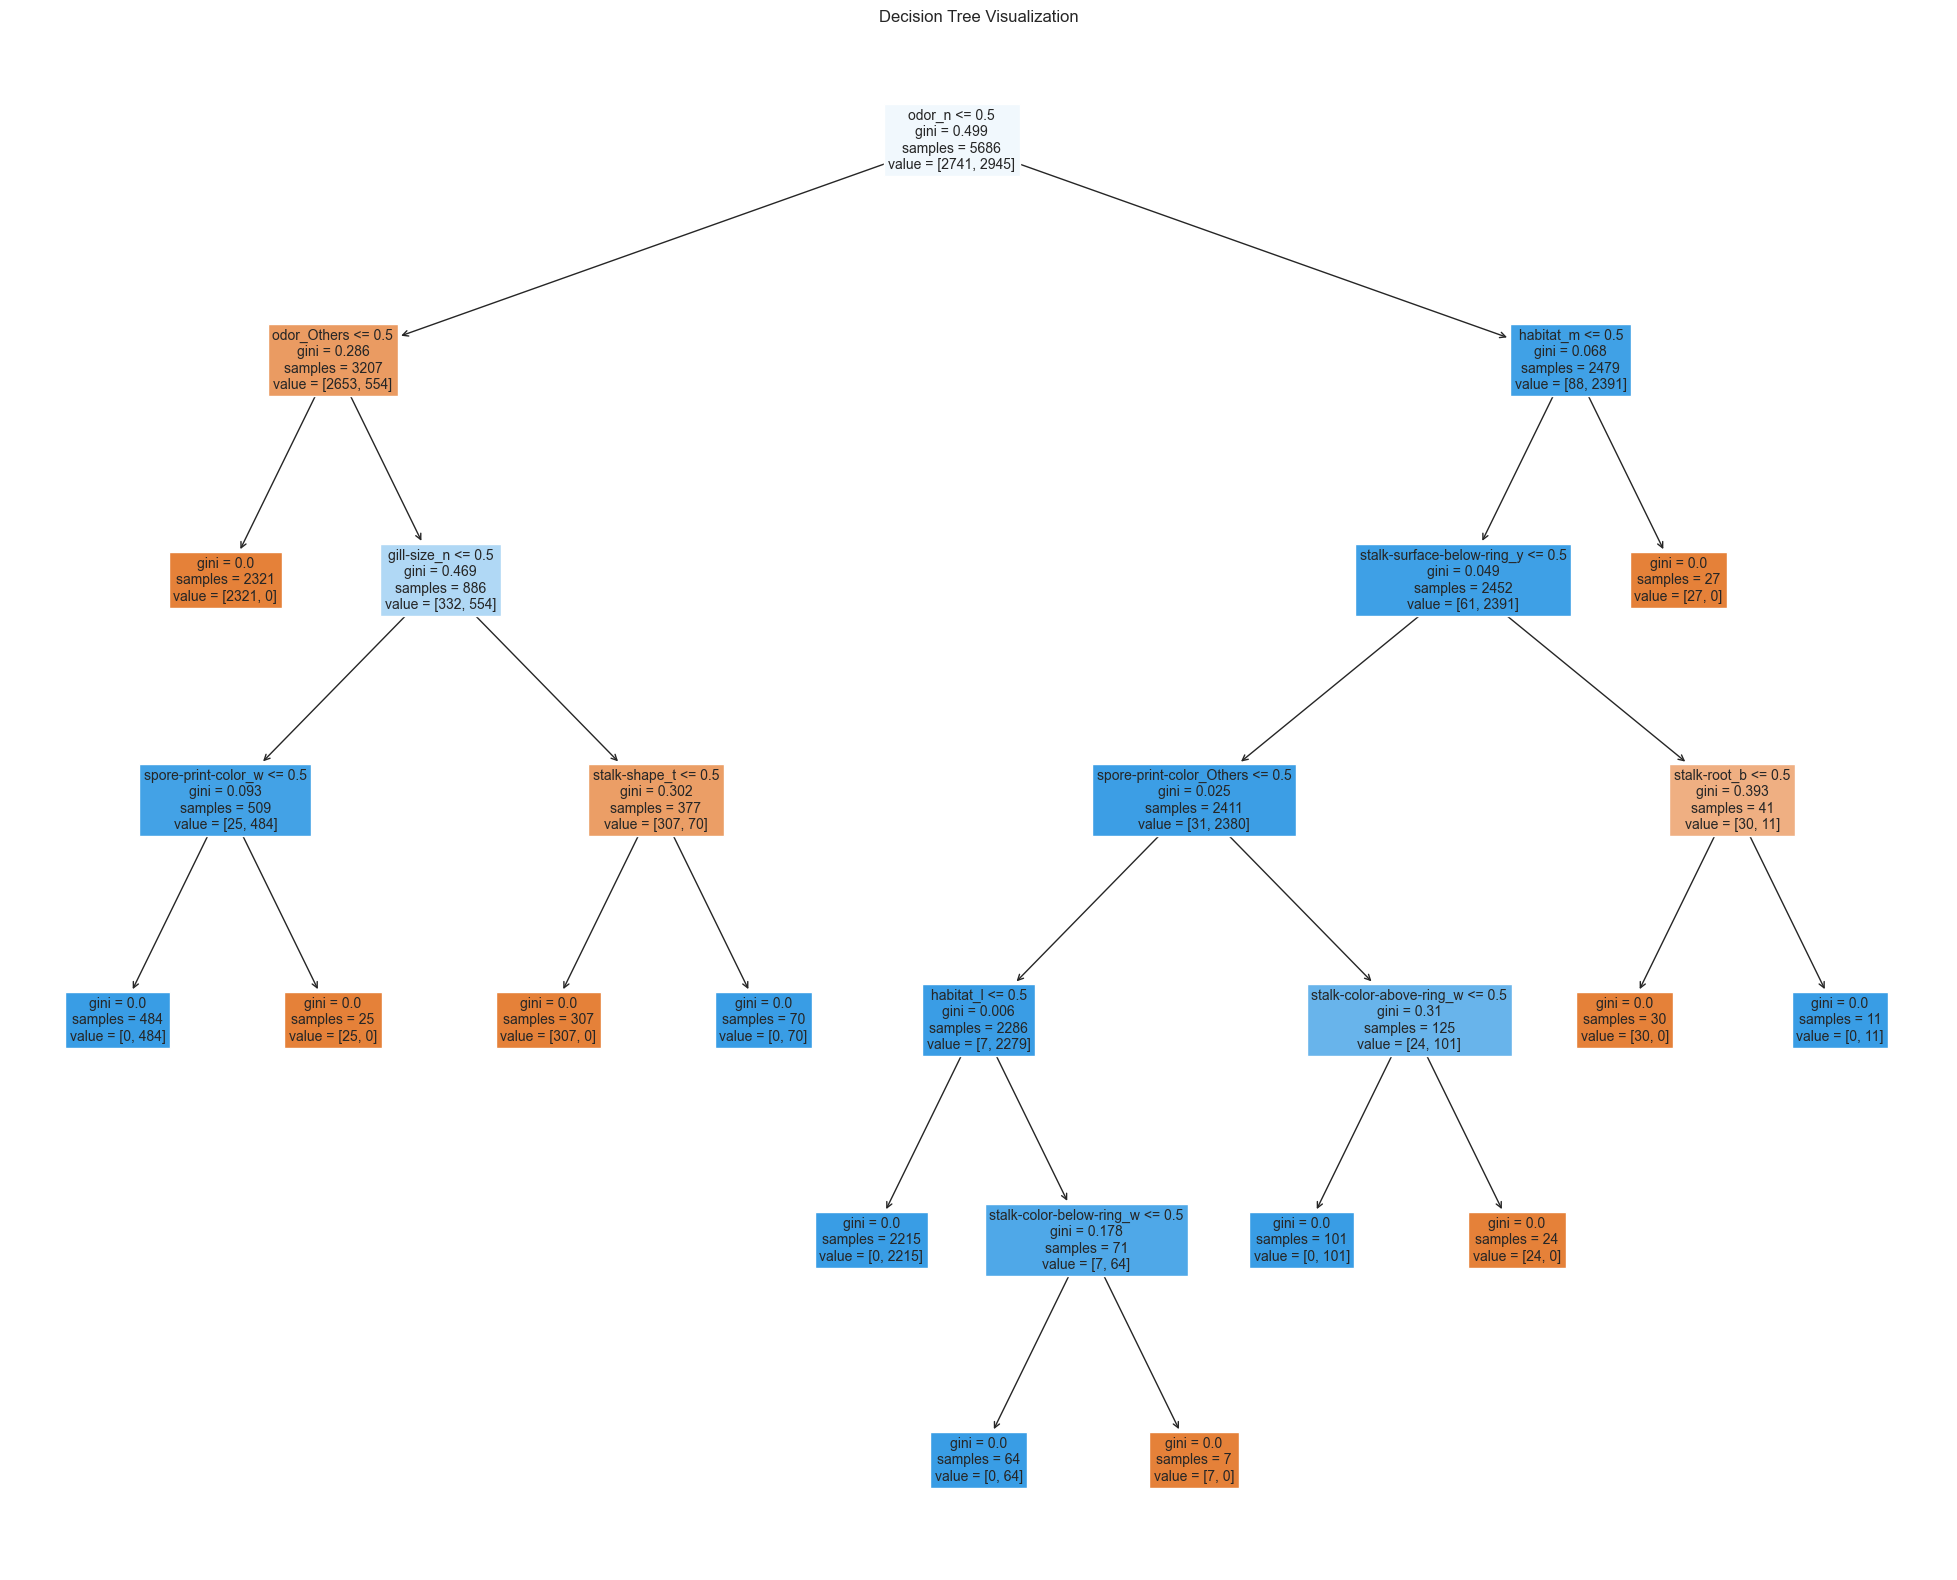

In [120]:
plt.figure(figsize=(25, 20))
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

## RandomForestClassifier

From [https://scikit-learn.org/](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to
> improve the predictive accuracy and control over-fitting

Random Forest, compared to a single Decision Tree classifier, offers several advantages due to its ensemble nature:
  - Reduced Overfitting: Random Forest mitigates overfitting present in individual Decision Trees by aggregating predictions from multiple trees.
  - Improved Performance: By combining the predictions of multiple Decision Trees, Random Forest tends to provide higher accuracy and better generalization than a single Decision Tree classifier.
  - Feature Importance Estimation: Random Forest calculates feature importance by analyzing the contribution of each feature in decision-making across multiple trees. This information aids in understanding which features are more influential in the classification process.
  - Built-in Model Robustness: It's less sensitive to hyperparameters and doesn't require extensive tuning compared to tuning an individual Decision Tree, making it a more robust choice out-of-the-box for various datasets.
  - Handling Missing Values

In [121]:
param_grid_random_forest_cls = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [2, 5, 10, 15], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

In [122]:
baseline_random_forest_cls = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=baseline_random_forest_cls, param_grid=param_grid_random_forest_cls, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
best_params_random_forest_cls = grid_search.best_params_

In [ ]:
best_params_random_forest_cls

In [ ]:
best_random_forest_cls = RandomForestClassifier(**best_params_random_forest_cls)
best_random_forest_cls.fit(X_train, y_train)

In [ ]:
y_pred = best_random_forest_cls.predict(X_test)

In [ ]:
test_accuracy_best_random_forest_cls = accuracy_score(y_test, y_pred)

In [ ]:
test_accuracy_best_random_forest_cls

In [ ]:
cm_best_random_forest_cls_test = confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(cm_best_random_forest_cls_test)

In [ ]:
test_best_random_forest_report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
pd.DataFrame(test_best_random_forest_report).transpose()

In [ ]:
calculate_feature_importance(best_random_forest_cls, X)

## LGBMClassifier

LightGBM uses the gradient boosting framework, constructing ensemble models sequentially, where each new model corrects errors made by the previous ones.

In [ ]:
param_grid_lgbm_cls = {
    'num_leaves': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [ ]:
lgbm_classifier = LGBMClassifier(force_row_wise=True)

In [ ]:
grid_search_lgbm_cls = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid_lgbm_cls, cv=3, scoring='accuracy')
grid_search_lgbm_cls.fit(X_train, y_train)

In [ ]:
best_params_lgbm_cls = grid_search_lgbm_cls.best_params_

In [ ]:
best_params_lgbm_cls

In [ ]:
best_model_lgbm_cls = grid_search_lgbm_cls.best_estimator_

In [ ]:
best_model_lgbm_cls

In [ ]:
y_pred_lgbm_cls = best_model_lgbm_cls.predict(X_test)
accuracy_score(y_test, y_pred_lgbm_cls)

In [ ]:
cm_lgbm_cls = confusion_matrix(y_test, y_pred_lgbm_cls)
plot_confusion_matrix(cm_lgbm_cls)

In [ ]:
test_lgbm_cls_report = classification_report(y_test, y_pred_lgbm_cls, output_dict=True)
pd.DataFrame(test_best_tree_cls_report).transpose()

In [ ]:
calculate_feature_importance(best_model_lgbm_cls, X)

In [ ]:
y_pred_proba_lgbm_cls = best_model_lgbm_cls.predict_proba(X_test)
log_loss_lgbm_cls = log_loss(y_test, y_pred_proba_lgbm_cls)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

## CatBoostClassifier

From [https://www.linkedin.com/](https://www.linkedin.com/pulse/boosting-techniques-battle-catboost-vs-xgboost-lightgbm-uttam-kumar)
> CatBoost is a powerful open-source gradient boosting library developed by Yandex. It is designed to handle categorical features natively and provides > state-of-the-art performance on many tabular data problems.One of the key features of CatBoost is that it can handle categorical features 
> automatically. It can learn the best way to convert categorical features into numerical values during training, without requiring manual encoding. 
> This is achieved using a technique called ordered boosting, which learns the optimal ordering of categorical values based on their relationship to 
> the target variable.

In [ ]:
param_grid_cat_boost = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
}

In [ ]:
catboost = CatBoostClassifier()

In [ ]:
grid_search_cat_boost = GridSearchCV(estimator=catboost, param_grid=param_grid_cat_boost, cv=3, scoring='accuracy')
grid_search_cat_boost.fit(X_train, y_train)

In [ ]:
best_params_cat_boost = grid_search_cat_boost.best_params_

In [ ]:
best_params_cat_boost

In [ ]:
best_score_cat_boost = grid_search_cat_boost.best_score_

In [ ]:
best_score_cat_boost

In [ ]:
best_cat_boost = grid_search_cat_boost.best_estimator_

In [ ]:
y_pred_cat_boost = best_cat_boost.predict(X_test)
accuracy_score(y_test, y_pred_cat_boost)

In [ ]:
cm_cat_boost = confusion_matrix(y_test, y_pred_cat_boost)
plot_confusion_matrix(cm_cat_boost)

In [ ]:
test_cat_boost_cls_report = classification_report(y_test, y_pred_cat_boost, output_dict=True)
pd.DataFrame(test_cat_boost_cls_report).transpose()

In [ ]:
calculate_feature_importance(best_cat_boost, X)

In [ ]:
y_pred_proba_best_cat_boost = best_cat_boost.predict_proba(X_test)
log_loss_cat_boost = log_loss(y_test, y_pred_proba_best_cat_boost)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

In [ ]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

best_cat_boost.fit(train_pool, eval_set=test_pool)
res = best_cat_boost.calc_feature_statistics(train_pool, test_pool, feature=17, plot_file="best_cat_boost_odr_n.html")

## SVC

In [ ]:
param_grid_svm_cls = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

In [ ]:
svm_classifier = SVC()

In [ ]:
grid_search_svm_cls = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm_cls, cv=5, scoring='accuracy')
grid_search_svm_cls.fit(X_train, y_train)

In [ ]:
best_params_svm_cls = grid_search_svm_cls.best_params_

In [ ]:
best_params_svm_cls 

In [ ]:
best_svm_cls = grid_search_svm_cls.best_estimator_

In [ ]:
best_svm_cls

In [ ]:
y_pred_best_svm_cls = best_svm_cls.predict(X_test)
accuracy_best_svm_cls = accuracy_score(y_test, y_pred_best_svm_cls)

In [ ]:
accuracy_best_svm_cls

In [ ]:
best_svm_cls.coef_

In [ ]:
best_svm_cls.intercept_

In [ ]:
best_svm_cls.support_vectors_

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

svm = SVC(kernel='linear', C=1, gamma=0.1)
svm.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, s=8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary using PCA')
plt.show()

In [ ]:
nu_values = [0.1, 0.3, 0.5, 0.7]

for nu in nu_values:
    nu_svm = NuSVC(kernel='linear', nu=nu)
    nu_svm.fit(X_train, y_train)
    
    train_accuracy = nu_svm.score(X_train, y_train)
    test_accuracy = nu_svm.score(X_test, y_test)
    
    print(f"NuSVC with nu={nu}: Train accuracy - {train_accuracy:.4f}, Test accuracy - {test_accuracy:.4f}")

In [ ]:
param_grid_nu_svc = {
    'nu': [0.1, 0.3, 0.5, 0.7],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

In [ ]:
nusvm = NuSVC()

In [ ]:
grid_search_nu_svc = GridSearchCV(nusvm, param_grid_nu_svc, cv=5)
grid_search_nu_svc.fit(X_train, y_train)

In [ ]:
grid_search_nu_svc.best_params_

In [ ]:
grid_search_nu_svc.best_score_

In [ ]:
one_class_svm = OneClassSVM(nu = 0.05)
one_class_svm.fit(X_train)
outliers = one_class_svm.predict(X_train)

In [ ]:
sum(outliers == -1)

In [ ]:
sum(outliers == -1) / len(X_train)

In [ ]:
outliers = one_class_svm.predict(X_test)

In [ ]:
sum(outliers == -1)

In [ ]:
sum(outliers == -1) / len(X_test)